# 🧬 CuMiDa Breast Cancer Gene Expression Analysis
### PCA & t-SNE Visualization on GSE45827 Dataset

**Author:** Sina Abyar  
**Date:** July 2025  
**Dataset:** GSE45827 from [CuMiDa](https://sbcb.inf.ufrgs.br/cumida)  
**Goal:** Explore gene expression patterns in breast cancer subtypes using PCA and t-SNE.

## 📚 Table of Contents
1. [Dataset Overview](#📥-1.-Dataset-Overview)
2. [EDA](#📊-2.-EDA:-Exploratory-Data-Analysis)
3. [Feature Preparation](#🔢-3.-Feature-Preparation)
4. [PCA vs t-SNE Comparisons](#🔻-4.-PCA-vs-t-SNE-Comparisons)
5. [Results](#📉-5.-Visual-Results)
6. [Conclusion](#✅-Conclusion)


---

## 📌 Tags  
`#machine-learning` `#bioinformatics` `#dimensionality-reduction` `#PCA` `#tSNE`  
`#gene-expression` `#breast-cancer` `#visualization` `#scikit-learn` `#python`

---

## 📥 1. Dataset Overview

- **Samples:** 151  
- **Genes (Features):** 54,676  
- **Classes (Labels):** 6 types  
    - luminal_A  
    - luminal_B  
    - HER  
    - basal  
    - normal  
    - cell_line  

---

## 📊 2. EDA: Exploratory Data Analysis

In this section, we:
- Inspected data shape, types, and missing values
- Visualized class distribution
- Differentiated categorical vs numerical features

---

## 🔢 3. Feature Preparation

- Dropped `samples` and `type` columns to isolate numeric gene expression matrix  
- Applied `StandardScaler` to normalize data  
- Prepared two matrices: `X` (raw) and `X_scaled` (normalized)

---

## 🔻 4. PCA vs t-SNE Comparisons

We compare the following 6 setups for visualizing class separability:

| Dim. Reduction Method | On Raw Data (`X`) | On Scaled Data (`X_scaled`) |
|------------------------|-------------------|------------------------------|
| PCA (2D)              | ✅                 | ✅                            |
| t-SNE (2D)            | ✅                 | ✅                            |
| PCA (95%) → t-SNE     | ✅                 | ✅                            |

Each visualization is color-coded by the sample's `type`.

---

In [1]:
# 📦 Imports and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

warnings.filterwarnings("ignore")

In [2]:
# 📥 Load Dataset
df = pd.read_csv('Breast_GSE45827.csv')
df.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,84,basal,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,...,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
1,85,basal,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,...,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
2,87,basal,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,...,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
3,90,basal,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
4,91,basal,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,...,12.173642,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947


In [3]:
# 📊 Data Overview
print("=" * 60)
print("DATA DESCRIPTION")
print("=" * 60)
print(f"Number of observations: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")
df.isnull().sum()

DATA DESCRIPTION
Number of observations: 151
Number of features: 54677


samples            0
type               0
1007_s_at          0
1053_at            0
117_at             0
                  ..
AFFX-ThrX-5_at     0
AFFX-ThrX-M_at     0
AFFX-TrpnX-3_at    0
AFFX-TrpnX-5_at    0
AFFX-TrpnX-M_at    0
Length: 54677, dtype: int64

In [4]:
# 🔍 Feature Types
print("=" * 60)
print("FEATURE DESCRIPTION")
print("=" * 60)
print(df.dtypes)
print("-" * 60)
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']
print(f"Number of categorical features: {len(cat_cols)}")
print(f"Number of numerical features: {len(num_cols)}")

FEATURE DESCRIPTION
samples              int64
type                object
1007_s_at          float64
1053_at            float64
117_at             float64
                    ...   
AFFX-ThrX-5_at     float64
AFFX-ThrX-M_at     float64
AFFX-TrpnX-3_at    float64
AFFX-TrpnX-5_at    float64
AFFX-TrpnX-M_at    float64
Length: 54677, dtype: object
------------------------------------------------------------
Number of categorical features: 1
Number of numerical features: 54676


## 🔻 PCA vs t-SNE Comparisons
Compare PCA, t-SNE, and PCA(95%)+t-SNE on both raw and scaled data.

In [5]:
# 🧼 Missing Values
print("=" * 60)
print("MISSING VALUE DETECTION")
print("=" * 60)
if df.isnull().sum().sum() > 0:
    print(df.isnull().sum())
else:
    print("No missing value present in any feature of these observations.")

MISSING VALUE DETECTION
No missing value present in any feature of these observations.


## 📉5. Visual Results
2D visualization of data under different dimension reduction settings.

Text(0.5, 1.0, 'Type Distribution')

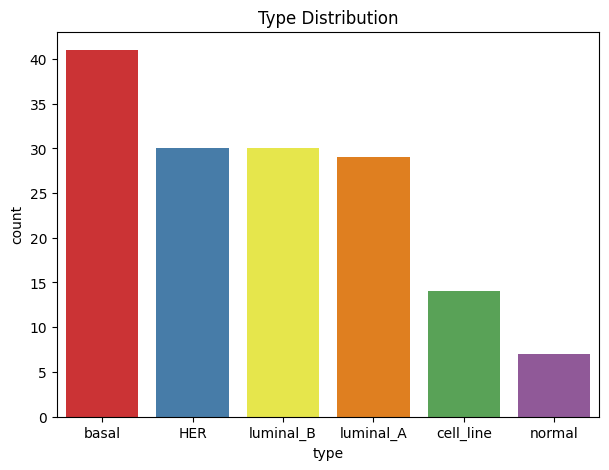

In [6]:
# 🎯 Target Distribution
df["type"].value_counts()
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='type', palette='Set1', order=df['type'].value_counts().index, hue='type')
plt.title('Type Distribution')

In [7]:
# 🧪 Prepare Features
X = df.drop(columns=['samples', 'type'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Missing value detection
print("=" * 60)
print("MISSING VALUE DETECTION")
print("=" * 60)
if df.isnull().sum().sum() > 0:
    print(df.isnull().sum())
else:
    print("No missing value present in any feature of these observations.")

MISSING VALUE DETECTION
No missing value present in any feature of these observations.


In [9]:
# 📈 Plotting Function for 2D Results
def plot_2d(X_2d, title, labels, save=False, filename=None):
    plt.figure(figsize=(7, 5))
    sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=labels, palette='Set1', alpha=0.9)
    plt.title(title)
    plt.xlabel("Dim 1")
    plt.ylabel("Dim 2")
    plt.legend(title='Type')
    plt.tight_layout()
    plt.grid(True)
    if save and filename:
        plt.savefig(filename, dpi=300)
    plt.show()

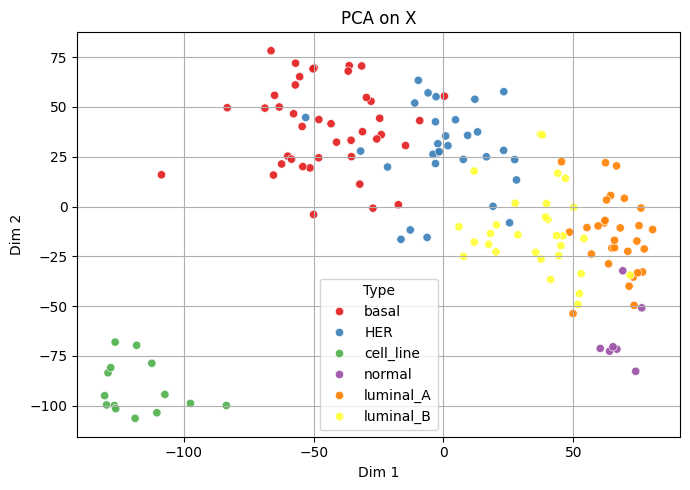

In [10]:
# 🔵 PCA on X (Unscaled)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plot_2d(X_pca, "PCA on X", df["type"])

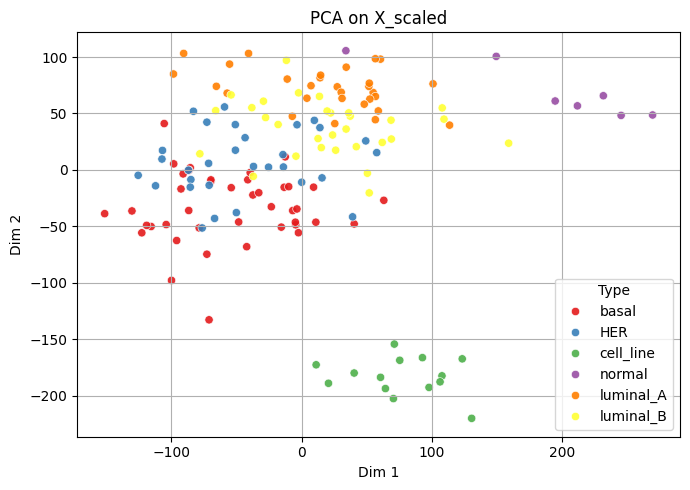

In [11]:
# 🔵 PCA on X_scaled
pca_scaled = PCA(n_components=2)
X_pca_scaled = pca_scaled.fit_transform(X_scaled)
plot_2d(X_pca_scaled, "PCA on X_scaled", df["type"])

In [12]:
# 🔍 PCA with 95% Variance for Later Use
pca_95 = PCA(n_components=0.95)
X_pca_95 = pca_95.fit_transform(X)

pca_scaled_95 = PCA(n_components=0.95)
X_scaled_pca_95 = pca_scaled_95.fit_transform(X_scaled)

print(f"[PCA on X] Number of components for 95% variance: {pca_95.n_components_}")
print(f"[PCA on X_scaled] Number of components for 95% variance: {pca_scaled_95.n_components_}")

[PCA on X] Number of components for 95% variance: 115
[PCA on X_scaled] Number of components for 95% variance: 126


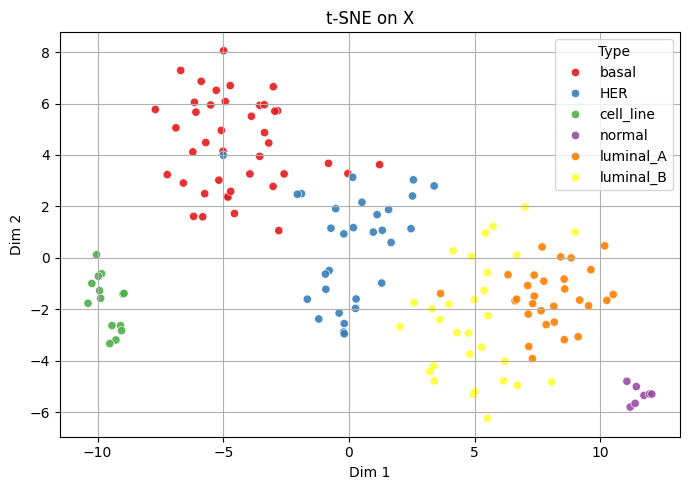

In [13]:
# 🔴 t-SNE on X
tsne = TSNE(random_state=42)
X_tsne = tsne.fit_transform(X)
plot_2d(X_tsne, "t-SNE on X", df["type"])

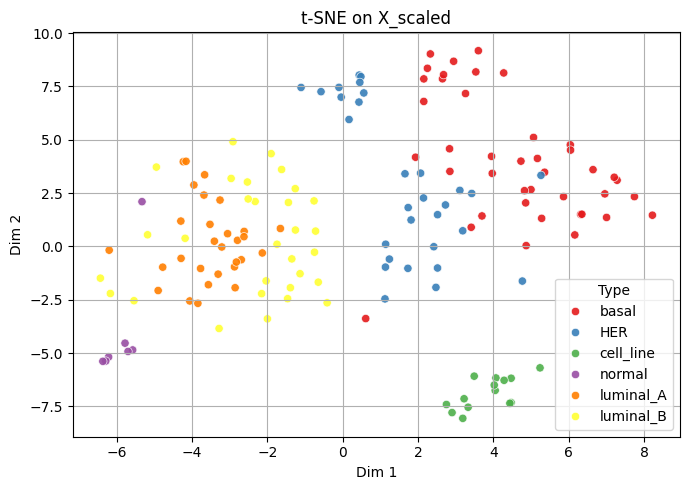

In [14]:
# 🔴 t-SNE on X_scaled
tsne_scaled = TSNE(random_state=42)
X_tsne_scaled = tsne_scaled.fit_transform(X_scaled)
plot_2d(X_tsne_scaled, "t-SNE on X_scaled", df["type"])

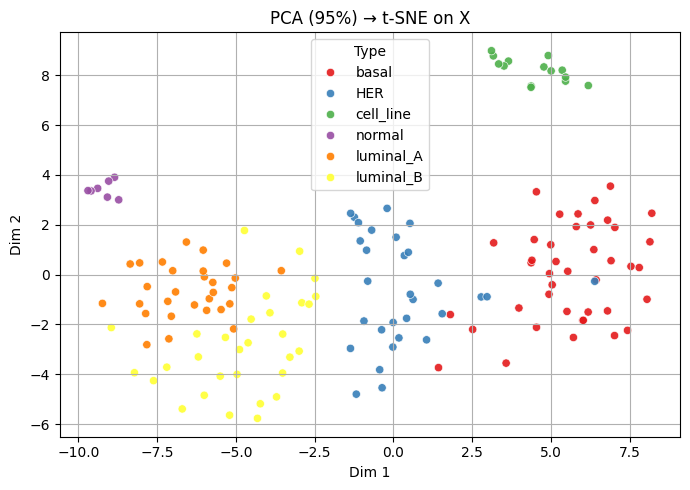

In [15]:
# 🟣 PCA (95%) → t-SNE on X
tsne_pca = TSNE(random_state=42)
X_tsne_pca = tsne_pca.fit_transform(X_pca_95)
plot_2d(X_tsne_pca, "PCA (95%) → t-SNE on X", df["type"])

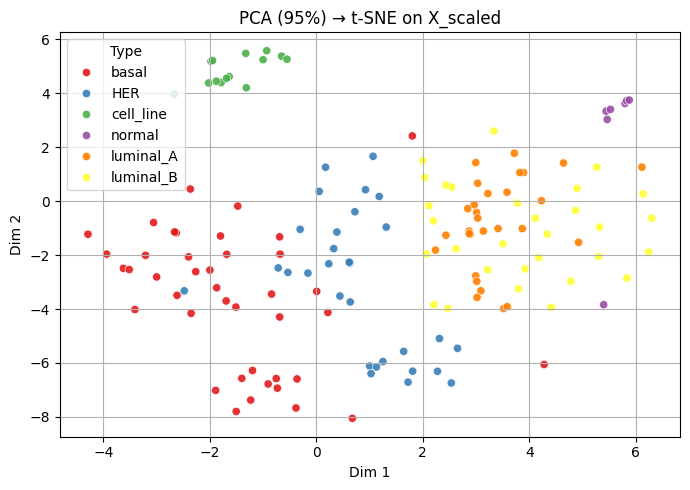

In [16]:
# 🟣 PCA (95%) → t-SNE on X_scaled
tsne_scaled_pca = TSNE(random_state=42)
X_tsne_scaled_pca = tsne_scaled_pca.fit_transform(X_scaled_pca_95)
plot_2d(X_tsne_scaled_pca, "PCA (95%) → t-SNE on X_scaled", df["type"])

---

## ✅ 6. Conclusion

- Among all visualizations, **t-SNE on raw `X`** provided the **most class separation**.
- **PCA → t-SNE** reduced noise and dimensionality, which helps **speed**, but at some cost to visual clarity.
- These results suggest gene expression **carries significant discriminatory power** across subtypes.
- This insight can guide **classification model building**, especially in feature selection and preprocessing.


---

## 🔗 Next Steps

You can extend this analysis by:

1. Using **PCA(95%)** components for training a **classification model** (e.g. RandomForest, SVM)
2. Comparing model accuracy on:
    - Raw features
    - PCA-reduced features
3. Testing generalization to new samples


---

## 🧠 Final Thoughts

This notebook demonstrates a full pipeline of:
- Biomedical gene expression preprocessing
- Dimensionality reduction via PCA and t-SNE
- Visualization and biological insight extraction

Stay tuned for the classification phase 🔬
